# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.1,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 9.3256822637491208, performing 125.9 it/sec
Step 100: Loss = 0.2280861356862025, performing 331.7 it/sec
Step 200: Loss = 0.0056719234692265, performing 449.9 it/sec
No improvement since Step 168, early stopping.
[Best]  Step 167: Loss = 0.0056738619540824
[Final] Step 217: Loss = 0.0056176602063459

predicted end states
-------------------------------------
          5th       Mean      95th
OCPP-1   3.00e-01  3.00e-01  3.00e-01
OCPP-2   2.45e-09  2.49e-09  2.54e-09
OCPP-3   4.34e-06  4.34e-06  4.34e-06
OCPP-4   4.24e-11  4.24e-11  4.24e-11
OCPP-5   1.80e-10  1.80e-10  1.80e-10
OCPP-6   9.88e-07  9.88e-07  9.88e-07
OCPP-7   1.01e-11  1.01e-11  1.01e-11
OCPP-8   1.00e-11  1.00e-11  1.00e-11
OCPP-9   1.42e-09  1.42e-09  1.42e-09
OCPP-10  9.89e-07  9.89e-07  9.89e-07


predicted conditional events
------------------------------------

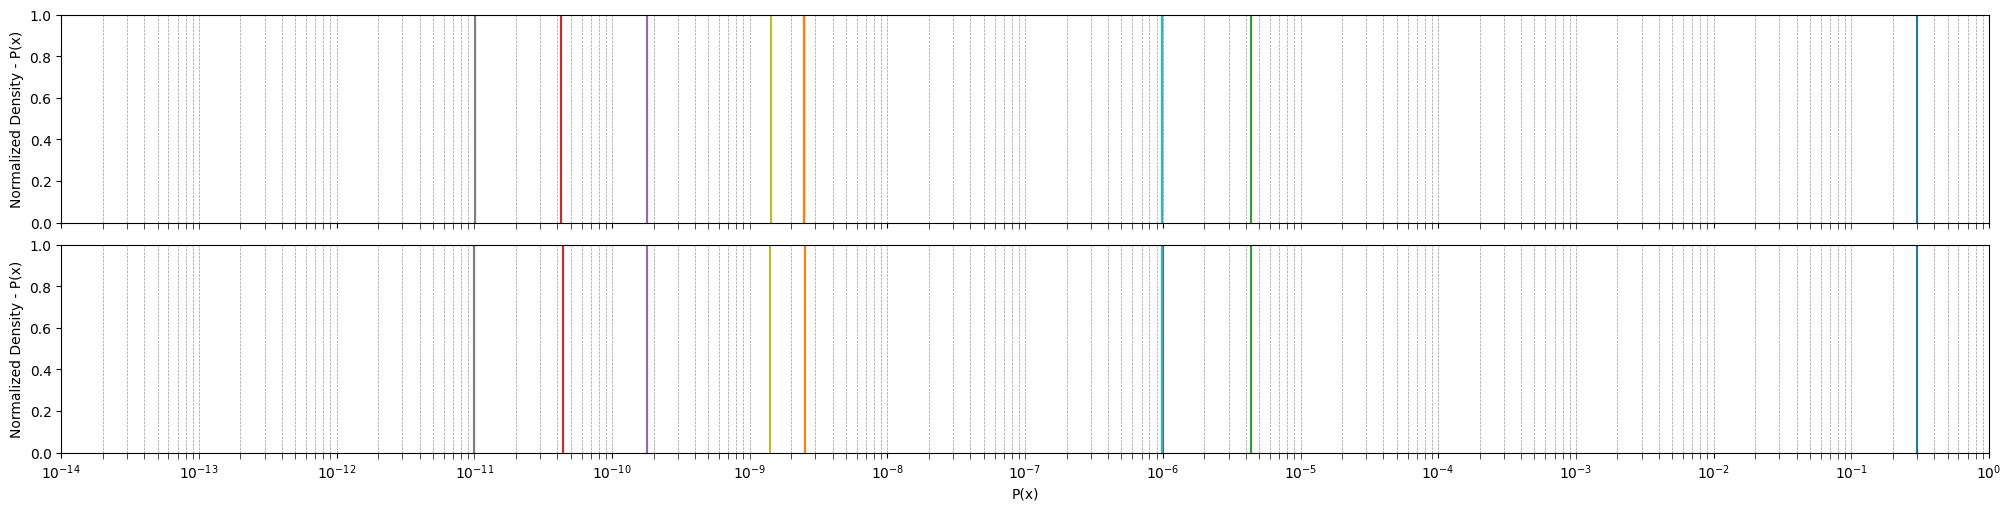

In [4]:
tunable = {
 'num_samples': 100,      # number of monte carlo samples
 'learning_rate': 0.1,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve,
 'initiating_event_frequency': 3e-1,
 'freeze_initiating_event': True,
}

conditional_events = {
    'names': ['OCPP', 'RSIG', 'RROD', 'SPTR', 'BPHR', 'DHRS|BPHR', 'DHRS|~SPTR', 'DHRL|~BPHR', 'DHRL|~DHRS|BPHR', 'DHRL|~DHRS|~SPTR'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'OCPP-1': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 0, np.nan, np.nan],
        'probability': 3e-1,
    },
    'OCPP-2': {
        'sequence': [1, 0, 0, np.nan, 0, np.nan, np.nan, 1, np.nan, np.nan],
        'probability': 2.50e-9,
    },
    'OCPP-3': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 0, np.nan],
        'probability': 4.4e-6,
    },
    'OCPP-4': {
        'sequence': [1, 0, 0, np.nan, 1, 0, np.nan, np.nan, 1, np.nan],
        'probability': 4.4e-11,
    },
    'OCPP-5': {
        'sequence': [1, 0, 0, np.nan, 1, 1, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.8e-10,
    },
    'OCPP-6': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 0],
        'probability': 1e-6,
    },
    'OCPP-7': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 0, np.nan, np.nan, 1],
        'probability': 1.0e-11,
    },
    'OCPP-8': {
        'sequence': [1, 0, 1, 0, np.nan, np.nan, 1, np.nan, np.nan, np.nan],
        'probability': 1.0e-11,
    },

    'OCPP-9': {
        'sequence': [1, 0, 1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.4e-9,
    },

    'OCPP-10': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 9.8e-7,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_metrics=False)